In [12]:
import math
from scripts_stock.cfg.out_file_name import OutFileName
from scripts_stock.cfg.set_dir import ProjectDir
from scripts_stock.cfg.stock_list import *
from scripts_stock.utils.analysis.stock_stat_index import df_to_stock_df, stock_kdj
import os
from scripts_stock.utils.common import CommonScript
from scripts_stock.utils.string_process import StringProcess

pd.set_option('display.max_rows', None)  # 显示所有行
pd.set_option('display.max_columns', None)  # 显示所有列
pd.set_option('display.width', None)  # 自动调整列宽

def get_data_sql_str(stock_index):
    return f"""SELECT *  FROM prd_t_fuquan_dfcf  where date>='2024-03-01' and date<='2024-04-20' and stock_index={stock_index} """


conn = CommonScript.connect_to_db("test.db")
cursor = conn.cursor()
df1 = pd.read_sql_query(get_data_sql_str("600611"),conn)
df1["volume_w"] = df1["transaction_volume"]/10000
df1

,date,open,close,high,low,transaction_volume,stock_index,update_time,volume_w


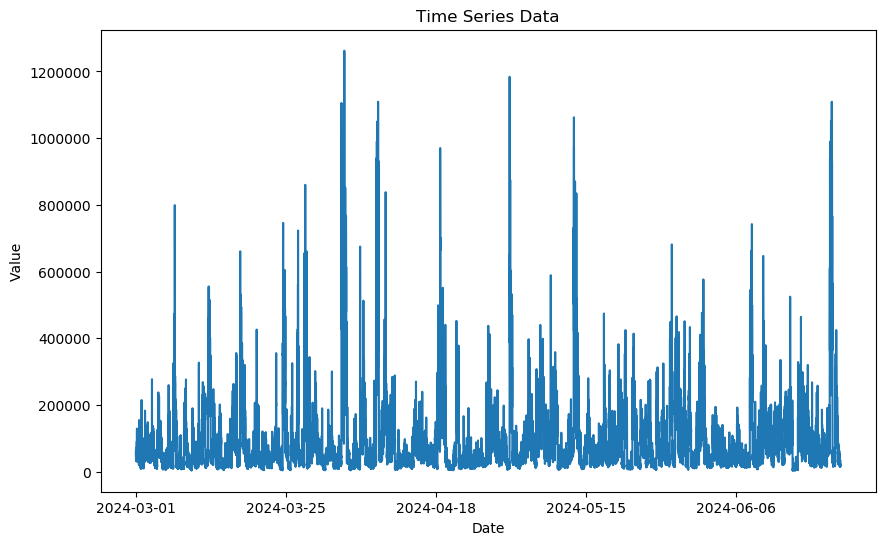

In [8]:
import matplotlib.pyplot as plt
# 将 date 列转换为 datetime 类型，并设置为 DataFrame 的索引
# df1['date'] = pd.to_datetime(df2['date'])

df1.set_index('date', inplace=True)
# 绘制时间序列图
df1['volume_w'].plot(figsize=(10, 6))

# 添加标题和标签
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')

# 显示图表
plt.show()

In [7]:
df2 = df1[df1['stock_index']==600011][["date","close","stock_index"]]
df3 = df1[df1['stock_index']==895][["date","close","stock_index"]]
merged_df = pd.merge(df2, df3, on='date', how='inner')
merged_df.head(2)

correlation = merged_df['close_x'].corr(merged_df['close_y'], method='pearson')
correlation

-0.10339113535903083

In [26]:
from socket import AF_AX25


stock_index1 = []
stock_index2 = []
corr_list = []
stock_combine = []
stock_list_uni = df1['stock_index'].unique()
for i in stock_list_uni:
    for k in stock_list_uni:
        aa = [str(i),str(k)]
        aa.sort()
        aa1 = '_'.join(aa)
        if i!=k and aa1 not in stock_combine:
            df2 = df1[df1['stock_index']==i][["date","close","stock_index"]]
            df3 = df1[df1['stock_index']==k][["date","close","stock_index"]]
            merged_df = pd.merge(df2, df3, on='date', how='inner')
            correlation = merged_df['close_x'].corr(merged_df['close_y'], method='pearson')
            stock_index1.append(i)
            stock_index2.append(k)
            corr_list.append(round(correlation,2))
            stock_combine.append(aa1)





In [17]:

# 创建DataFrame
df_out = pd.DataFrame({
    'stock_index1': stock_index1,
    'stock_index2': stock_index2,
    'corr': corr_list
})
df_out.sort_values("corr",ascending=False)

,stock_index1,stock_index2,corr
52642,2812,603659,0.99
54411,600570,600588,0.99
40466,600588,600570,0.99
9461,2129,601012,0.99
40775,601939,601398,0.99
...,...,...,...
40943,601939,603185,-0.95
59194,601988,603185,-0.96
48735,603185,601988,-0.96
48525,603185,601398,-0.97


In [24]:
aa

In [25]:
i=22
k=232
aa = [str(i),str(k)]
aa.sort()
aa1 = '_'.join(aa)
aa1

'22_232'

In [2]:
df1['return_ratio'] = df1['close'] / df1['close'].shift(1)
df1

,date,open,close,high,low,stock_index,update_time,return_ratio
0,2012-05-29,0.85,0.87,0.88,0.83,601398,2024-09-30 00:54:26.629962,NaN
1,2012-05-30,0.86,0.87,0.90,0.83,601398,2024-09-30 00:54:26.629962,1.000000
2,2012-06-01,0.86,0.89,0.89,0.83,601398,2024-09-30 00:54:26.629962,1.022989
3,2012-06-04,0.87,0.82,0.87,0.80,601398,2024-09-30 00:54:26.629962,0.921348
4,2012-06-05,0.84,0.85,0.89,0.83,601398,2024-09-30 00:54:26.629962,1.036585
...,...,...,...,...,...,...,...,...
2995,2024-09-23,5.66,5.72,5.74,5.62,601398,2024-09-30 00:54:26.629962,1.008818
2996,2024-09-24,5.75,6.00,6.00,5.73,601398,2024-09-30 00:54:26.629962,1.048951
2997,2024-09-25,6.09,6.04,6.22,5.97,601398,2024-09-30 00:54:26.629962,1.006667
2998,2024-09-26,6.04,6.20,6.21,6.00,601398,2024-09-30 00:54:26.629962,1.026490
